# Handling Imbalanced Dataset in Machine Learning

Link to the Youtube tutorial video: https://www.youtube.com/watch?v=JnlM4yLFNuo&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=21

**You have to try different methods to handle imbalanced dataset to identify which method works the best for your scenario (dataset), because in machine learning there is no guarantee a method can work best for a scenario without trying all alternative methods.**

**Motivation of handling imbalance dataset before training a machine learning model:**
1) Fraud detection is a common problem that people try to solve in the field of machine learning but when you're training your model with a training set for fraud transaction you will often find that you will have 10 000 good transaction and only one will be fraud.
2) This creates an imbalance in your dataset and even if you write a simple python prediction function which returns false all the time, even with that stupid function, you can get 99 percent accuracy because majority of the transactions are not fraud but on the other hand what you care about is the fraud transaction.<br />
    <img src="hidden\photo1.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
3) Hence, although accuracy is 99 percent, the function is still performing horribly because it's not telling you what is fraud.
4) So this kind of imbalance creates a lot of issues in the field of machine learning and there are ways to tackle that. 



# Load the dataset

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Load the dataset into a dataframe called df
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2880,2187-PKZAY,Male,0,No,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.95,1043.4,No
3495,4988-IQIGL,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.35,75.35,Yes
5408,6407-GSJNL,Female,0,No,No,51,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.95,1288,No
3890,3886-CERTZ,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.8,Yes
5461,1221-GHZEP,Female,0,No,No,62,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Two year,Yes,Mailed check,65.10,3846.75,No


# Data Preprocessing (Part 1)

In [3]:
# Drop the customerID feature/column from the df dataframe. Inplace is set as true so that after dropping customerID feature, it will update the same df dataframe.
df.drop('customerID', axis='columns', inplace=True)

# Show all the columns of df dataframe and their corresponding data type
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# According to df.dtypes, TotalCharges is object type. This code also shows that TotalCharges is a string in 1D array
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
# Convert TotalCharges feature/column in df dataframe from a 1D array of string into a 1D array of number column (in the format of numpy series) using to_numeric(). errors='coerce' means the using to_numeric() will convert for whatever columns with ignoring errors (EG: NaN)
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
# isnull() will tell if the value of each row is null or not
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
# Show all samples in df dataset whose TotalCharges feature is null
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Access the Nth sample information using iloc[]. i means integer, loc means location.
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
# Check the value of TotalCharges feature of the Nth sample
df.iloc[488]["TotalCharges"]

' '

In [10]:
# Save all samples in df dataframe whose TotalCharges feature is not null to the new dataframe called df1
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
# Convert TotalCharges feature/column in df1 dataframe from a 1D array of string into a 1D array of number column (in the format of numpy series) using to_numeric(), then update to df1 dataframe.
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

# Confirm TotalCharges feature/column in df1 dataframe now is in the format of number column (numpy series)
df1.TotalCharges.dtypes

C:\Users\weiyo\AppData\Local\Temp\ipykernel_6240\1610378798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

# Data Visualization

## Histogram of Number of Customer vs Tenure 

Text(0.5, 1.0, 'Customer Churn Dataset Visualization (No. of Customer vs Tenure)')

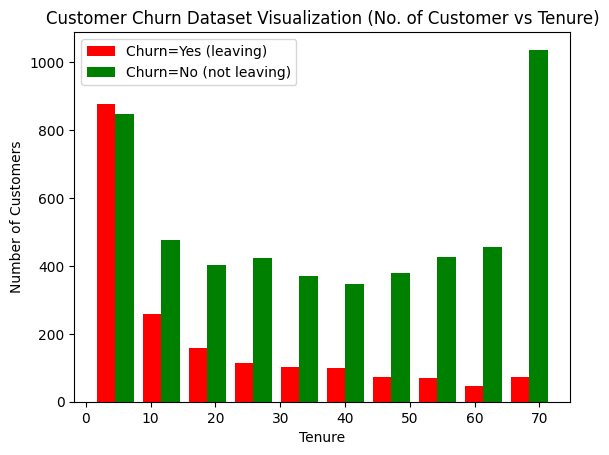

In [12]:
# Get the tenure feature values of samples/customers in df1 dataframe who are not leaving (churn=No), then save them into a numpy series called tenure_churn_no
tenure_churn_no = df1[df1.Churn=='No'].tenure

# Get the tenure feature values of samples/customers in df1 dataframe who are leaving (churn=Yes), then save them into a numpy series called tenure_churn_yes
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

# Plot a histogram with information of tenure_churn_no & tenure_churn_yes. Green for tenure_churn_yes, red for tenure_churn_no
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn=Yes (leaving)', 'Churn=No (not leaving)'])
plt.legend() # show the legend on the histogram
plt.xlabel('Tenure') # show the x-axis label on the histogram
plt.ylabel('Number of Customers') # show the y-axis label on the histogram
plt.title('Customer Churn Dataset Visualization (No. of Customer vs Tenure)') # show the title on the histogram

# Insights from the histogram: 
# 1) Majority of the customer with long tenure (with the company) are not leaving (Churn=No)
# 2) Majority of the customer with short tenure (with the company) are leaving (Churn=Yes)

## Histogram of Number of Customer vs Monthly Charge 

Text(0.5, 1.0, 'Customer Churn Dataset Visualization (No. of Customer vs Monthly Charge)')

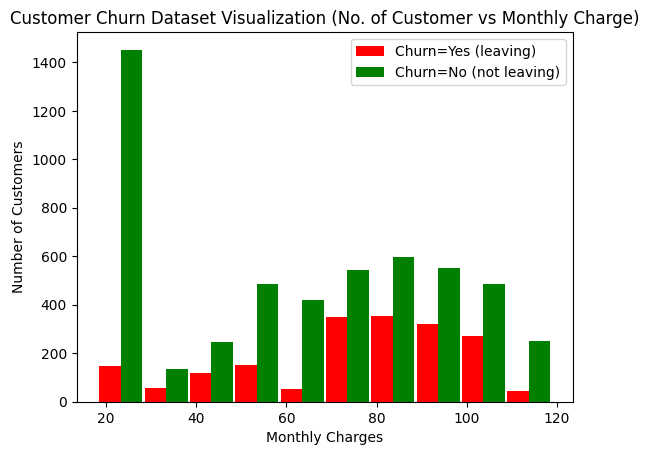

In [13]:
# Get the tenure feature values of samples/customers in df1 dataframe who are not leaving (churn=No), then save them into a numpy series called tenure_churn_no
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges

# Get the tenure feature values of samples/customers in df1 dataframe who are leaving (churn=Yes), then save them into a numpy series called tenure_churn_yes
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

# Plot a histogram with information of tenure_churn_no & tenure_churn_yes. Green for tenure_churn_yes, red for tenure_churn_no
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes (leaving)', 'Churn=No (not leaving)'])
plt.legend() # show the legend on the histogram
plt.xlabel('Monthly Charges') # show the x-axis label on the histogram
plt.ylabel('Number of Customers') # show the y-axis label on the histogram
plt.title('Customer Churn Dataset Visualization (No. of Customer vs Monthly Charge)') # show the title on the histogram

# Insights from the histogram: 
# 1) Majority of customers who are not leaving have low monthly charge 

# Data Preprocessing (Part 2)

## Data Cleaning

In [14]:
# Self-defined a function to print the unique values in the object-type categorical columns/features of the input dataframe
def print_unique_col_values(df):
    for column in df: # Iterate each column in the input dataframe
        if df[column].dtypes=='object': # If the column/feature is object type
            print(f'{column} : {df[column].unique()}') # Print its unique values using python f format string

# Show the unique values of each categorical column/feature in df1 dataframe
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
# Replace 'No internet service' with 'No' in df1 dataframe, then update/modify df1 dataframe (because 'No internet service' and 'No' has same meaning in this context)
df1.replace('No internet service', 'No', inplace=True) # Alternative way: df1 = df1.replace('No internet service', 'No')

# Replace 'No phone service' with 'No' in df1 dataframe, then update/modify df1 dataframe (because 'No phone service' and 'No' has same meaning in this context)
df1.replace('No phone service', 'No', inplace=True) 

# Show the unique values of each categorical column/feature in df1 dataframe
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\Users\weiyo\AppData\Local\Temp\ipykernel_6240\227830700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True) # Alternative way: df1 = df1.replace('No internet service', 'No')
C:\Users\weiyo\AppData\Local\Temp\ipykernel_6240\227830700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


Machine learning models do not understand text so we have to convert every text or a string type of column into a number

In [16]:
# Create a variable that contains the name of categorical columns/features whose unique values are 'Yes' and 'No'
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns: # Iterate each categrotical column name
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True) # Replace the unique values of the categorical column with 'Yes' with 1 & 'No' with 0 

# Show the unique values of each column/feature in df1 dataframe. # cannot use print_unique_col_values(df1) anymore because now most categorical columns are not object-type anymore
for col in df1: 
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


C:\Users\weiyo\AppData\Local\Temp\ipykernel_6240\2395137406.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True) # Replace the unique values of the categorical column with 'Yes' with 1 & 'No' with 0
C:\Users\weiyo\AppData\Local\Temp\ipykernel_6240\2395137406.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

1) When a categorical variable only has 2 values, then just replace them with 0 and 1 respectively.     <br \>
2) When a categorical variable only more than 2 values, then just convert them into one-hot-encoding representation (to avoid the ranking effect deteriorate machine learning performance).     <br \>

In [17]:
# Replace 'Female' with '1' & 'Male' with '0' in df1 dataframe, then update/modify df1 dataframe.
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True) 

C:\Users\weiyo\AppData\Local\Temp\ipykernel_6240\595001316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
C:\Users\weiyo\AppData\Local\Temp\ipykernel_6240\595001316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [18]:
# Convert the unique values of 'InternetService', 'Contract' & 'PaymentMethod' features in df1 dataframe into one-hot-encoding representation. Then save the whole dataframe results into a new dataframe called df2.
df2 = pd.get_dummies(data = df1, columns= ['InternetService', 'Contract', 'PaymentMethod'], dtype=int)
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [19]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4172,1,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2642,1,0,1,0,47,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2296,0,1,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5990,0,0,0,1,36,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [20]:
# Check the data types in df2 dataframe, ensure no object-type column (All values under the columns are in number format)
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

## Data Scaling

Ensure all features are on the same scale. Here, all feature values are on the scale between 0 and 1.

In [21]:
# Create a variable to store the name of columns required to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Create a scaler

# Scale the values of the column whose name is included in cols_to_scale variable, then update the scaled columns back to the df2 dataframe again.
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3593,0,0,0,0,0.098592,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1670,0,1,0,1,0.000000,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [22]:
# Show the unique values of each column/feature in df2 dataframe.
for col in df2: 
    print(f'{col}: {df2[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Data Spliiting

### Split the features and ground truth of the dataset as separate variables

In [23]:
# Save the features of the dataset into X variable
X = df2.drop('Churn', axis='columns')

# Save the ground truth of the dataset into Y variable
Y = df2['Churn']

### Split the features and ground truth into train and test sets

In [24]:
from sklearn.model_selection import train_test_split

# Spit the features and ground truth into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

print('Number of samples in the train set: ', X_train.shape[0])
print('Number of features of each sample in the train set: ', X_train.shape[1])
print('Number of samples in the test set: ', X_test.shape[0])

Number of samples in the train set:  5625
Number of features of each sample in the train set:  26
Number of samples in the test set:  1407


In [25]:
# The dataset is imbalance (Class 0 [Churn=0, not leaving] has 5163 samples; Class 1 [Churn=1, leaving] has 1869 samples)
print('\nSample statistics in dataset (overall):')
print(Y.value_counts())

print('\nThe ratio of samples Class 0 / Class 1 in dataset (overall): ', Y.value_counts()[0]/Y.value_counts()[1])



# Hence, the test set is also imbalance (Class 0 [Churn=0, not leaving] has 999 samples; Class 1 [Churn=1, leaving] has 408 samples)
print('\nSample statistics in test set:')
print(Y_test.value_counts())
print('\nThe ratio of samples Class 0 / Class 1 in test set: ', Y_test.value_counts()[0]/Y_test.value_counts()[1])


Sample statistics in dataset (overall):
Churn
0    5163
1    1869
Name: count, dtype: int64

The ratio of samples Class 0 / Class 1 in dataset (overall):  2.7624398073836276

Sample statistics in test set:
Churn
0    999
1    408
Name: count, dtype: int64

The ratio of samples Class 0 / Class 1 in test set:  2.448529411764706


# Develop a neural network (without handling imbalanced dataset)

1) The neural network used in this tutorial is Artificial Neural Network (ANN), which consists of only 4 layers (an input layer, 2 hidden layers, and an output layer)
2) The F1-score for class 1 (Churn=1, leaving) is low because this dataset is imbalanced (The samples of Churn=0 [Not leaving] is far more than the samples of Churn=1 [leaving])
3) Accuracy is useless if your dataset is imbalanced. What is important is to get the F1-score for each class high.
4) The goal of this tutorial is handling imbalanced dataset to improve the F1-score for all classes so that the model (neural network) can perform (predict) equally well for samples of all classes

In [26]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

# Self-define a function to create the structure of a neural network, compile the model, evaluate the model using test set, print the classification report and prints the rounded predicted results
def ANN(X_train, Y_train, X_test, Y_test, loss, weights):
    # Create the structure of the neural network
    model = keras.Sequential([
        # The hidden layer (the 2nd layer), which consists of 26 neurons, with ReLU as the activation function. Before this layer is the input layer (the 1st layer, of shape/consists 26 input neurons) which receive 26 features from the train set. 
        keras.layers.Dense(20, input_shape = (26,), activation='relu'),
        # The hidden layer (the 3rd layer), which consists of 15 neurons, with ReLU as the activation function.
        keras.layers.Dense(20, input_shape = (15,), activation='relu'),
        # The output layer (the 4th layer), which consists of 1 output neuron (to provide score if the customer churn) with sigmoid function as the activation function.
        keras.layers.Dense(1, activation = 'sigmoid')
    ])

    # Compile the neural network
    model.compile(optimizer = 'adam',
                loss = loss, 
                metrics = ['accuracy'])

    if weights == -1:
        model.fit(X_train, Y_train, epochs = 100)
    else:
        model.fit(X_train, Y_train, epochs = 100, class_weight = weights)

    # Evaluate the model using test set
    print(model.evaluate(X_test, Y_test))

    # Use the model to make prediction over the samples in test set
    Y_predicted = model.predict(X_test)
    # Round the predicted results
    Y_predicted_rounded = np.round(Y_predicted)

    # Print the classification report
    print('Classification Report:\n', classification_report(Y_test, Y_predicted_rounded))

    # Return the rounded predicted results
    return Y_predicted_rounded

# Get the rounded predicted results over the samples in test set
Y_predicted_rounded = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5914 - loss: 0.6381
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7899 - loss: 0.4373
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 0.4221
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8108 - loss: 0.4114
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8102 - loss: 0.4105
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8127 - loss: 0.4065
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8128 - loss: 0.4062
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8141 - loss: 0.4012
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8163 - loss: 0.3997
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8063 - loss: 0.4024
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8088 - loss: 0.4129
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# Technique to handle imbalanced dataset

You have to try different methods to handle imbalanced dataset to identify which method works the best for your scenario (dataset), because in machine learning there is no guarantee a method can work best for a scenario without trying all alternative methods.

## Method 1: Undersampling

Let's say in test set, number samples of Class 0 = j while number samples of Class 1 = k, where j>k. We only takes k number of Class 0 samples and k number of Class 1 samples to concatenate together then split them into train and test set before using them to train the model

<img src="hidden\undersampling.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br /><br />

### Data Preprocessing

In [27]:
# Count the samples of different classes in df1 dataframe
count_class_0, count_class_1 = df1.Churn.value_counts()
print('Number of Class 0 samples in total: ', count_class_0)
print('Number of Class 1 samples in total: ', count_class_1)

# Divide by class
# Save only Class 0 samples to a new dataframe called df_class_0
df_class_0 = df2[df2['Churn']==0]
# Save only Class 1 samples to a new dataframe called df_class_1
df_class_1 = df2[df2['Churn']==1]

print('The df_class_0 dataframe (that only contains Class 0 samples) consists of ' + str(df_class_0.shape[0]) + ' samples, while each sample consists of ' + str(df_class_0.shape[1]) + ' features.')
print('The df_class_1 dataframe (that only contains Class 1 samples) consists of ' + str(df_class_1.shape[0]) + ' samples, while each sample consists of ' + str(df_class_1.shape[1]) + ' features.')


Number of Class 0 samples in total:  5163
Number of Class 1 samples in total:  1869
The df_class_0 dataframe (that only contains Class 0 samples) consists of 5163 samples, while each sample consists of 27 features.
The df_class_1 dataframe (that only contains Class 1 samples) consists of 1869 samples, while each sample consists of 27 features.


In [28]:
# Randomly select count_class_1 number (random undersampling) of Class 0 samples in df_class_0 dataframe, then store them into a new dataframe called df_class_0_undersampled
df_class_0_undersampled = df_class_0.sample(count_class_1)

# Concatenate all samples in df_class_0_undersampled dataframe & all samples in df_class_1 dataframe in rows, then save them into a new dataframe called df_undersampling
df_undersampling = pd.concat([df_class_0_undersampled,df_class_1], axis=0)

print('The df_undersampling dataframe (that contains undersampled Class 0 samples & all Class 1 samples) consists of ' + str(df_undersampling.shape[0]) + ' samples, while each sample consists of ' + str(df_undersampling.shape[1]) + ' features.')

# Verify after random undersampling, both classes have same number of samples
print('\nRandom undersampling:\n', df_undersampling.Churn.value_counts()) 

The df_undersampling dataframe (that contains undersampled Class 0 samples & all Class 1 samples) consists of 3738 samples, while each sample consists of 27 features.

Random undersampling:
 Churn
0    1869
1    1869
Name: count, dtype: int64


### Split the undersampled dataset into features and ground truths variables

In [29]:
X_undersampling = df_undersampling.drop('Churn', axis='columns')
Y_undersampling = df_undersampling['Churn']

### Split the features and ground truths variables into train and test sets

In [30]:
# stratify takes the ground truths variable as input to ensure the samples of different classes in train and test sets are balanced (based on the ratio of the samples of different classes in ground truths variable)
X_train_undersampling, X_test_undersampling, Y_train_undersampling, Y_test_undersampling = train_test_split(X_undersampling, Y_undersampling, test_size=0.2, random_state=15, stratify=Y_undersampling)

print('Undersampled train set samples statistics:\n', Y_train_undersampling.value_counts()) 
print('\nUndersampled test set samples statistics:\n', Y_test_undersampling.value_counts()) 

Undersampled train set samples statistics:
 Churn
0    1495
1    1495
Name: count, dtype: int64

Undersampled test set samples statistics:
 Churn
1    374
0    374
Name: count, dtype: int64


### Get prediction results over samples in undersampled test set using ANN 

In [31]:
Y_predicted_rounded_undersampling = ANN(X_train_undersampling, Y_train_undersampling, X_test_undersampling, Y_test_undersampling, 'binary_crossentropy', -1)

# Insights: 
# The results show that when imbalanced dataset is handled using undersampling technique, the precision, recall and F1-score for Class 1 (minority class) samples are improved, but the precision, recall and F1-score for Class 0 (majority class) samples decreased, compared to the results obtained when imbalanced dataset is not handled. 
# But that's ok, because now you are doing fair treatment for minority class and majority class (the model now performs(predicts) equally well for samples of all classes)

Epoch 1/100


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6671 - loss: 0.6316
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5302
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7497 - loss: 0.5080
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.4977
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7615 - loss: 0.4910
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7562 - loss: 0.4911
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7556 - loss: 0.4935
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7515 - loss: 0.5099
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7723 - loss: 0.4773
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7584 - loss: 0.4827
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7523 - loss: 0.4939
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7759 - lo

## Method 2: Oversampling (by duplication)

Let's say in test set, number samples of Class 0 = j while number samples of Class 1 = k, where j>k. We increase the number of Class 1 samples to k (so that number of Class 0 and Class 1 samples are now same). Then, concatenate the Class 0 samples and oversampled Class 1 samples to together then split them into train and test set before using them to train the model

<img src="hidden\oversampling.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br /><br />

### Data Preprocessing

In [32]:
print('The df_class_0 dataframe (that only contains Class 0 samples) consists of ' + str(df_class_0.shape[0]) + ' samples, while each sample consists of ' + str(df_class_0.shape[1]) + ' features.')
print('The df_class_1 dataframe (that only contains Class 1 samples) consists of ' + str(df_class_1.shape[0]) + ' samples, while each sample consists of ' + str(df_class_1.shape[1]) + ' features.')

# Increase the number of samples in df_class_1 dataframe such that the number of samples in df_class_1 & df_class_0 are same.
# To increase the number of samples in df_class_1 dataframe, the original count_class_1 number of samples in df_class_1 are remained, but count_class_0 - count_class_1 = 131 samples are synthesized(generated) by randomly select the samples in df_class_1 dataframe and just copy & paste (duplicate) them (because replace=True) back to the same dataframe again.
# The updated oversampled df_class_1 dataframe is saved to a new dataframe called df_class_1_oversampled
df_class_1_oversampled = df_class_1.sample(count_class_0, replace=True)

print('The df_class_1_oversampled dataframe (that only contains Class 1 samples) consists of ' + str(df_class_1_oversampled.shape[0]) + ' samples, while each sample consists of ' + str(df_class_1_oversampled.shape[1]) + ' features.')

# Concatenate all samples in df_class_0 dataframe & all samples in df_class_1_oversampled dataframe in rows, then save them into a new dataframe called df_oversampling
df_oversampling = pd.concat([df_class_0,df_class_1_oversampled], axis=0)

print('The df_oversampling dataframe (that contains all Class 0 samples & oversampled Class 1 samples) consists of ' + str(df_oversampling.shape[0]) + ' samples, while each sample consists of ' + str(df_oversampling.shape[1]) + ' features.')

# Verify after random oversampling, both classes have same number of samples
print('\nRandom oversampling:\n', df_oversampling.Churn.value_counts()) 

The df_class_0 dataframe (that only contains Class 0 samples) consists of 5163 samples, while each sample consists of 27 features.
The df_class_1 dataframe (that only contains Class 1 samples) consists of 1869 samples, while each sample consists of 27 features.
The df_class_1_oversampled dataframe (that only contains Class 1 samples) consists of 5163 samples, while each sample consists of 27 features.
The df_oversampling dataframe (that contains all Class 0 samples & oversampled Class 1 samples) consists of 10326 samples, while each sample consists of 27 features.

Random oversampling:
 Churn
0    5163
1    5163
Name: count, dtype: int64


### Split the oversampled dataset into features and ground truths variables

In [33]:
X_oversampling = df_oversampling.drop('Churn', axis='columns')
Y_oversampling = df_oversampling['Churn']

### Split the features and ground truths variables into train and test sets

In [34]:
# stratify takes the ground truths variable as input to ensure the samples of different classes in train and test sets are balanced [class distribution is equal] (based on the ratio of the samples of different classes in ground truths variable)
X_train_oversampling, X_test_oversampling, Y_train_oversampling, Y_test_oversampling = train_test_split(X_oversampling, Y_oversampling, test_size=0.2, random_state=15, stratify=Y_oversampling)

print('Oversampled train set samples statistics:\n', Y_train_oversampling.value_counts()) 
print('\nOversampled test set samples statistics:\n', Y_test_oversampling.value_counts()) 

Undersampled train set samples statistics:
 Churn
1    4130
0    4130
Name: count, dtype: int64

Undersampled test set samples statistics:
 Churn
1    1033
0    1033
Name: count, dtype: int64


### Get prediction results over samples in oversampled test set using ANN 

In [35]:
Y_predicted_rounded_oversampling = ANN(X_train_oversampling, Y_train_oversampling, X_test_oversampling, Y_test_oversampling, 'binary_crossentropy', -1)

# Insights: 
# 1) The results show that when imbalanced dataset is handled using oversampling technique, the precision, recall and F1-score for Class 1 (minority class) samples are improved, but the precision, recall and F1-score for Class 0 (majority class) samples decreased, compared to the results obtained when imbalanced dataset is not handled. 
# But that's ok, because now you are doing fair treatment for minority class and majority class (the model now performs(predicts) equally well for samples of all classes)
# 2) According here, when imbalanced dataset is handled using oversampling technique, the precision, recall and F1-score for Class 1 (minority class) samples are improved better, compared to the ones using undersampling technique.

Epoch 1/100


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6891 - loss: 0.6095
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7491 - loss: 0.5091
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7650 - loss: 0.4770
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.4869
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.4709
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7772 - loss: 0.4702
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7680 - loss: 0.4693
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7763 - loss: 0.4708
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7677 - loss: 0.4768
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.4754
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7865 - loss: 0.4564
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

## Method 3: Synthetic Minority Over-sampling Technique (SMOTE)

SMOTE is better than oversampling technique (Method 2) because SMOTE increases the samples of minority class through creating new samples out of the current samples of minority class using K nearest neighbours algorithm

<img src="hidden\smote.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br /><br />

In [36]:
# Save the features of the dataset into X variable
X = df2.drop('Churn', axis='columns')

# Save the ground truth of the dataset into Y variable
Y = df2['Churn']

# The dataset is imbalance (Class 0 [Churn=0, not leaving] has 5163 samples; Class 1 [Churn=1, leaving] has 1869 samples)
print('\nSample statistics in dataset (overall):')
print(Y.value_counts())


Sample statistics in dataset (overall):
Churn
0    5163
1    1869
Name: count, dtype: int64


### Data Preprocessing

In [40]:
from imblearn.over_sampling import SMOTE

# Create an object of SMOTE class caleed smote. sampling_strategy='minority' so that SMOTE will increase the samples of minority class (the class that has fewer samples compared to other class)
smote = SMOTE(sampling_strategy='minority')

# After SMOTE learn the minority class samples in X & Y (the input), it generates new samples using K nearest neighbours technique (without just copy & paste the existing minority class samples). The existing samples and new generated samples are saved to a dataframe, then the features of the dataframe are saved to X_SMOTE dataframe, while the ground truths are saved to Y_SMOTE
X_oversampling_SMOTE, Y_oversampling_SMOTE = smote.fit_resample(X, Y)

# Verify after SMOTE oversampling, both classes have same number of samples
print('\nSMOTE oversampling:\n', Y_oversampling_SMOTE.value_counts()) 




SMOTE oversampling:
 Churn
0    5163
1    5163
Name: count, dtype: int64


### Split the features and ground truths variables into train and test sets

In [42]:
# stratify takes the ground truths variable as input to ensure the samples of different classes in train and test sets are balanced [class distribution is equal] (based on the ratio of the samples of different classes in ground truths variable)
X_train_oversampling_SMOTE, X_test_oversampling_SMOTE, Y_train_oversampling_SMOTE, Y_test_oversampling_SMOTE = train_test_split(X_oversampling_SMOTE, Y_oversampling_SMOTE, test_size=0.2, random_state=15, stratify=Y_oversampling_SMOTE)

print('SMOTE oversampled train set samples statistics:\n', Y_train_oversampling_SMOTE.value_counts()) 
print('\nSMOTE oversampled test set samples statistics:\n', Y_test_oversampling_SMOTE.value_counts()) 

SMOTE oversampled train set samples statistics:
 Churn
1    4130
0    4130
Name: count, dtype: int64

SMOTE oversampled test set samples statistics:
 Churn
1    1033
0    1033
Name: count, dtype: int64


### Get prediction results over samples in SMOTE oversampled test set using ANN 

In [43]:
Y_predicted_rounded_oversampling_SMOTE = ANN(X_train_oversampling_SMOTE, Y_train_oversampling_SMOTE, X_test_oversampling_SMOTE, Y_test_oversampling_SMOTE, 'binary_crossentropy', -1)


# Insights: 
# 1) The results show that when imbalanced dataset is handled using SMOTE oversampling technique, the precision, recall and F1-score for Class 1 (minority class) samples are improved, but the precision, recall and F1-score for Class 0 (majority class) samples decreased, compared to the results obtained when imbalanced dataset is not handled. 
# But that's ok, because now you are doing fair treatment for minority class and majority class (the model now performs(predicts) equally well for samples of all classes)
# 2) 259 batch for each epoch, because by default the batch size is 32

Epoch 1/100


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6687 - loss: 0.6160
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7772 - loss: 0.4676
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.4672
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7829 - loss: 0.4577
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7923 - loss: 0.4458
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7868 - loss: 0.4559
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7844 - loss: 0.4535
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4367
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7961 - loss: 0.4446
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4276
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 0.4352
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Method 4: Use of Ensemble with undersampling

Let's say in test set, number samples of Class 0 = j while number samples of Class 1 = k, where j>k & (j : k) = (3 : 1). We divide the majority class (Class 0) samples into 3 batches

<img src="hidden\ensemble.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br /><br />

In [47]:
# Save the features of the dataset into X variable
X = df2.drop('Churn', axis='columns')

# Save the ground truth of the dataset into Y variable
Y = df2['Churn']

# The dataset is imbalance (Class 0 [Churn=0, not leaving] has 5163 samples; Class 1 [Churn=1, leaving] has 1869 samples)
print('\nSample statistics in dataset (overall):')
print(Y.value_counts())


Sample statistics in dataset (overall):
Churn
0    5163
1    1869
Name: count, dtype: int64


### Split the features and ground truths variables into train and test sets

In [51]:
# stratify takes the ground truths variable as input to ensure the samples of different classes in train and test sets are balanced [class distribution is equal] (based on the ratio of the samples of different classes in ground truths variable)
X_train_undersampling_ensemble, X_test_undersampling_ensemble, Y_train_undersampling_ensemble, Y_test_undersampling_ensemble = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=Y)

print('Oversampled train set samples statistics:\n', Y_train_undersampling_ensemble.value_counts()) 
print('\nOversampled test set samples statistics:\n', Y_test_undersampling_ensemble.value_counts()) 

# The ratio of Class 0 : Class 1 in train set = 2.76 (approx. 3). So we divide the majority class (Class 0) samples in train set into 3 batches OR using a batch of size = Class 1 samples number in train set (because also close to 1378)
print('\nhe ratio of Class 0 : Class 1 in train set= ', Y_train_undersampling_ensemble.value_counts()[0]/Y_train_undersampling_ensemble.value_counts()[1])

Oversampled train set samples statistics:
 Churn
0    4130
1    1495
Name: count, dtype: int64

Oversampled test set samples statistics:
 Churn
0    1033
1     374
Name: count, dtype: int64

he ratio of Class 0 : Class 1 in train set=  2.762541806020067


### Model 1 of ensemble method

#### Data Preprocessing

In [55]:
# Copy X_train and save into a new dataframe called df3 (df3 dataframe only contains train set samples)
df3 = X_train_undersampling_ensemble.copy()
# Create a new column called Churn in df3, then store information of Y_train_undersampling_ensemble in that newly created column
df3['Churn'] = Y_train_undersampling_ensemble

# Divide by class
# Save only Class 0 samples in df3 dataframe to a new dataframe called df3_class_0
df3_class_0 = df3[df3['Churn']==0]
# Save only Class 1 samples in df3 dataframe to a new dataframe called df3_class_1
df3_class_1 = df3[df3['Churn']==1]

# Self-define function to take a partition of majority class samples in train set, then concatenate them with minority class samples, then split all of them into features and ground truths variables
def get_train_batch(df_majority, df_minority, start, end):
    df_train_function = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train_function = df_train_function.drop('Churn', axis='columns')
    Y_train_function = df_train_function.Churn

    return X_train_function, Y_train_function

# Get the partition 1 of the majority class samples in train set
X_train_function_partition1, Y_train_function_partition1  = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

#### Get prediction results over samples in function undersampled test set using ANN (trained with majority class samples of partition 1)

In [56]:
# Using model 1 of the ensemble method
Y_predicted_rounded_ensemble_partition1 = ANN(X_train_function_partition1, Y_train_function_partition1, X_test_undersampling_ensemble, Y_test_undersampling_ensemble, 'binary_crossentropy', -1)

# Insights: Ignore the classification report of this model (we only look at the classification report of the majority vote part)

Epoch 1/100


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6368 - loss: 0.6530
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7561 - loss: 0.5305
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7455 - loss: 0.5160
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7539 - loss: 0.5034
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7663 - loss: 0.4931
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.4828
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7711 - loss: 0.4832
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.4748
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.4630
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7675 - loss: 0.4816
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7680 - loss: 0.4757
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - lo

### Model 2 of ensemble method

#### Data Preprocessing

In [57]:
# Get the partition 2 of the majority class samples in train set
X_train_function_partition2, Y_train_function_partition2  = get_train_batch(df3_class_0, df3_class_1, 1495, 2*(1495))

#### Get prediction results over samples in function undersampled test set using ANN (trained with majority class samples of partition 2)

In [58]:
# Using model 2 of the ensemble method
Y_predicted_rounded_ensemble_partition2 = ANN(X_train_function_partition2, Y_train_function_partition2, X_test_undersampling_ensemble, Y_test_undersampling_ensemble, 'binary_crossentropy', -1)

# Insights: Ignore the classification report of this model (we only look at the classification report of the majority vote part)

Epoch 1/100


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6514 - loss: 0.6427
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7457 - loss: 0.5238
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7624 - loss: 0.4880
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.4930
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.4812
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7648 - loss: 0.4861
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7727 - loss: 0.4692
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7646 - loss: 0.4759
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7706 - loss: 0.4716
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7678 - loss: 0.4667
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7726 - loss: 0.4610
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - lo

### Model 3 of ensemble method

#### Data Preprocessing

In [59]:
# Get the partition 3 of the majority class samples in train set
X_train_function_partition3, Y_train_function_partition3  = get_train_batch(df3_class_0, df3_class_1, 2*1495, 3*1495)

#### Get prediction results over samples in function undersampled test set using ANN (trained with majority class samples of partition 3)

In [60]:
# Using model 3 of the ensemble method
Y_predicted_rounded_ensemble_partition3 = ANN(X_train_function_partition3, Y_train_function_partition3, X_test_undersampling_ensemble, Y_test_undersampling_ensemble, 'binary_crossentropy', -1)

# Insights: Ignore the classification report of this model (we only look at the classification report of the majority vote part)

Epoch 1/100


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5854 - loss: 0.6850
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7606 - loss: 0.5554
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7490 - loss: 0.5117
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7732 - loss: 0.4802
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7609 - loss: 0.4996
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7781 - loss: 0.4762
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.4692
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7722 - loss: 0.4733
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7776 - loss: 0.4668
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7934 - loss: 0.4444
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7828 - loss: 0.4660
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7777 - lo

### Take majority vote of the ensemble method (majority vote among the 3 models)

In [68]:
# Create a numpy array called Y_predicted_rounded_ensemble_majority, by simply copy the information of Y_predicted_rounded_ensemble_partition1 numpy array to it
Y_predicted_rounded_ensemble_majority = Y_predicted_rounded_ensemble_partition1.copy()

# Run this for loop for len(Y_predicted_rounded_ensemble_partition1) iterations
for i in range(len(Y_predicted_rounded_ensemble_partition1)):
    # At each iteration, access a predicted result made by model 1, model 2, and model 3 respectively, then save the sum of the predicted results of all models for a sample to n_ones variable at an index. At ith iteration, the predicted result made by each model is for the ith sample in the Y_test_undersampling_ensemble, the sum of the predicted results will be saved at ith index of n_ones.
    n_ones = Y_predicted_rounded_ensemble_partition1[i] + Y_predicted_rounded_ensemble_partition2[i] + Y_predicted_rounded_ensemble_partition3[i]
    if n_ones>1: # Since each model will provide predicted result only either 0 or 1 for a sample. If n_ones at an index >1, means at least 2 models provide predicted result of 1, so the majority vote is 1 (means the ensemble method provide predicted result of 1) for the corresponding sample in test set. 
        Y_predicted_rounded_ensemble_majority[i] = 1
    else:  # If n_ones at an index = 0, means all 3 models provide predicted result of 0, so the majority vote is 0 (means the ensemble method provide predicted result of 0) for the corresponding sample in test set. 
        Y_predicted_rounded_ensemble_majority[i] = 0

# Print the classification report of the ensemble method
print(classification_report(Y_test_undersampling_ensemble, Y_predicted_rounded_ensemble_majority))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1033
           1       0.46      0.80      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.69      0.71      1407

